In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-11-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 212s 315ms/step - loss: 0.3007 - accuracy: 0.8684 - val_loss: 0.2325 - val_accuracy: 0.8994
Epoch 2/10
625/625 [==============================] - 191s 306ms/step - loss: 0.2390 - accuracy: 0.8984 - val_loss: 0.2026 - val_accuracy: 0.9144
Epoch 3/10
625/625 [==============================] - 180s 289ms/step - loss: 0.2234 - accuracy: 0.9025 - val_loss: 0.2106 - val_accuracy: 0.9096
Epoch 4/10
625/625 [==============================] - 181s 290ms/step - loss: 0.2178 - accuracy: 0.9069 - val_loss: 0.2336 - val_accuracy: 0.8950
Epoch 5/10
625/625 [==============================] - 181s 290ms/step - loss: 0.1977 - accuracy: 0.9169 - val_loss: 0.1905 - val_accuracy: 0.9210
Epoch 6/10
625/625 [==============================] - 174s 279ms/step - loss: 0.1945 - accuracy: 0.9167 - val_loss: 0.2009 - val_accuracy: 0.9130
Epoch 7/10
625/625 [==============================] - 175s 281ms/step - loss: 0.1845 - accuracy: 0.9222 - val_loss: 0.1948 -

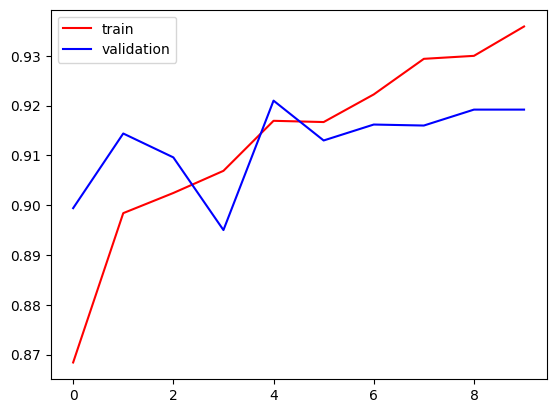

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

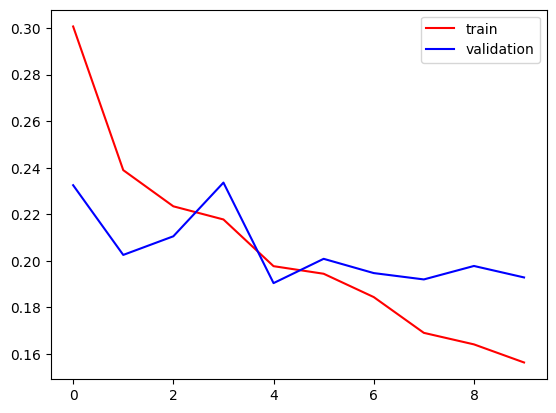

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()